In [7]:
import numpy as np
import pandas as pd
import time
import logging
import os
import matplotlib.pyplot as plt


from __init__ import *
from snmcseq_utils import mcc_percentile_norm
from snmcseq_utils import plot_tsne_labels
from snmcseq_utils import plot_tsne_values

In [8]:
# The purpose of this is to visualize before upload to browsers


In [9]:



# path setup
ens = 'Ens2'


ens_path = os.path.join(PATH_ENSEMBLES, ens)

# tsne choose perp30
tsne_path = os.path.join(ens_path, 'tsne/tsne_ndim2_perp30_npc50_binc_mCH_100000_nmcc_{}.tsv'.format(ens))
# tsne_path = os.path.join(ens_path, 'tsne/tsne_ndim2_perp30_npc50_binc_mCHmCG_100000_nmcc_{}.tsv'.format(ens))

# clustering choose k30 
cluster_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCH_100000_nmcc_{}.tsv'.format(ens)) 
# cluster_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCHmCG_100000_nmcc_{}.tsv'.format(ens)) 

# annotation choose k30
annotation_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCH_100000_nmcc_{}.tsv.annot'.format(ens)) 
# annotation_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCHmCG_100000_nmcc_{}.tsv.annot'.format(ens)) 

# mapping summary
meta_path = os.path.join(ens_path, 'mapping_summary_{}.tsv'.format(ens))

# cell qc
cellcovr_path = os.path.join(ens_path, 'binc_mCH_100000_QC_cells_covr_{}.tsv'.format(ens))

# 


In [10]:
# data loading

df_tsne = pd.read_table(tsne_path, index_col='sample')
df_cluster = pd.read_table(cluster_path, index_col='sample')
df_meta = pd.read_table(meta_path, index_col='Sample')
df_cellcovr = pd.read_table(cellcovr_path, index_col='sample')
df_annot = pd.read_table(annotation_path, index_col='cluster_ID')

df_cluster = pd.merge(df_cluster, df_annot, left_on='cluster_ID', right_index=True, how='left')

print(df_tsne.shape)
print(df_cluster.shape)
print(df_meta.shape)
print(df_cellcovr.shape)

df_all = pd.concat([df_tsne, df_cluster, df_meta, df_cellcovr], axis=1)
print(df_all.shape)
df_all.head()

df_meta.head()

(1270, 2)
(1270, 2)
(1270, 14)
(1270, 2)
(1270, 20)


,Total reads,Mapped reads,Mapping rate,Nonclonal reads,% Nonclonal rate,Filtered reads,Filtered rate,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered
Sample,,,,,,,,,,,,,,
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171207_3C_1_CEMBA171207_3C_2_D2_AD010_indexed,3005226,1973182,0.657,1512943,0.767,1280129,0.846,0.0,0.00743,0.75858,0.02518,0.75677,0.01788,5.35
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171207_3C_1_CEMBA171207_3C_2_E7_AD006_indexed,4741398,3021597,0.637,2179111,0.721,1865979,0.856,0.0,0.00787,0.75152,0.02924,0.74955,0.02154,7.68
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171207_3C_1_CEMBA171207_3C_2_H2_AD004_indexed,5856390,3710497,0.634,2895860,0.780,2508012,0.866,0.0,0.00605,0.73940,0.01735,0.73781,0.01137,10.10
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171207_3C_1_CEMBA171207_3C_2_A2_AD007_indexed,2685480,1772026,0.660,1336875,0.754,1152781,0.862,0.0,0.00756,0.80896,0.02977,0.80750,0.02238,4.84
171213_CEMBA_mm_P56_P63_3C_MOp_CEMBA171207_3C_3_CEMBA171207_3C_4_D1_AD002_indexed,3370960,2250191,0.668,1714159,0.762,1478205,0.862,NaN,0.00816,0.80237,0.03584,0.80074,0.02791,6.17


In [11]:
df_all[df_all.tsne_y > 200]
print(df_meta.columns.values)

['Total reads' 'Mapped reads' 'Mapping rate' 'Nonclonal reads'
 '% Nonclonal rate' 'Filtered reads' 'Filtered rate' 'Lambda mC/C'
 'mCCC/CCC' 'mCG/CG' 'mCH/CH' 'Estimated mCG/CG' 'Estimated mCH/CH'
 '% Genome covered']


In [4]:

# lim = {'t_ylim': [-100, 150], 't_xlim': [-100, 100]}
# lim = {'t_ylim': None, 't_xlim': None}
# ylim = [np.nanpercentile(df_all['tsne_y'].values, 0.1), np.nanpercentile(df_all['tsne_y'].values, 99.9)]
# xlim = [np.nanpercentile(df_all['tsne_x'].values, 0.1), np.nanpercentile(df_all['tsne_x'].values, 99.9)]

# ylim[0] = ylim[0] - 0.1*(ylim[1] - ylim[0])
# ylim[1] = ylim[1] + 0.1*(ylim[1] - ylim[0])
# xlim[0] = xlim[0] - 0.1*(xlim[1] - xlim[0])
# xlim[1] = xlim[1] + 0.1*(xlim[1] - xlim[0])

# lim = {'t_ylim': ylim,
#        't_xlim': xlim}

plt.close('all')
tc_list_labels = ['cluster_ID', 'cluster_annotation']
tc_list_values = ['mCH/CH', 'mCG/CG', '% Genome covered', 'Mapping rate', 'Nonclonal reads', 'covr_before', 'covr_after']
for tc in tc_list_labels:
    plot_tsne_labels(df_all, tc=tc, legend_mode=1,  
                    output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)), 
#                     **lim
                    )
for tc in tc_list_values:
    plot_tsne_values(df_all, tc=tc, 
                    output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc.replace('/', '-'), ens)), 
#                     **lim
                    )
# tc = 'cluster_ID'
# plot_tsne_labels(df_all, tc=tc, legend_mode=-1,  
#                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)), 
#                 **lim)
# tc = 'cluster_ID'
# plot_tsne_labels(df_all, tc=tc, legend_mode=-1,  
#                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)), 
#                 **lim)
# tc = 'cluster_ID'
# plot_tsne_labels(df_all, tc=tc, legend_mode=-1,  
#                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)), 
#                 **lim)
# plot_tsne_labels(df_all, tc='cluster_annotation', s=5, legend_mode=1, 
#                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)),
#                 **lim)
# # plot_tsne_values(df_all, tc='mCH/CH', 
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))
# # plot_tsne_values(df_all, tc='mCG/CG', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))

# # plot_tsne_values(df_all, tc='covr_before', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))
# # plot_tsne_values(df_all, tc='covr_after', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))
# # plot_tsne_values(df_all, tc='% Genome covered', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))
# # plot_tsne_values(df_all, tc='Mapping rate', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))
# # plot_tsne_values(df_all, tc='Nonclonal reads', **lim,
# #                 output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)))


NameError: name 'df_all' is not defined

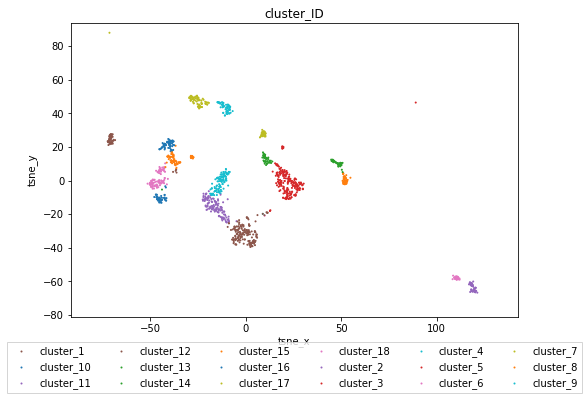

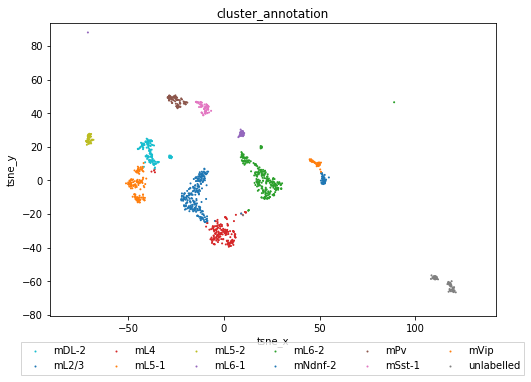

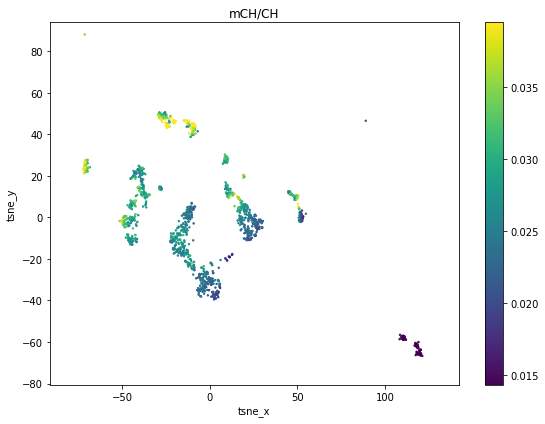

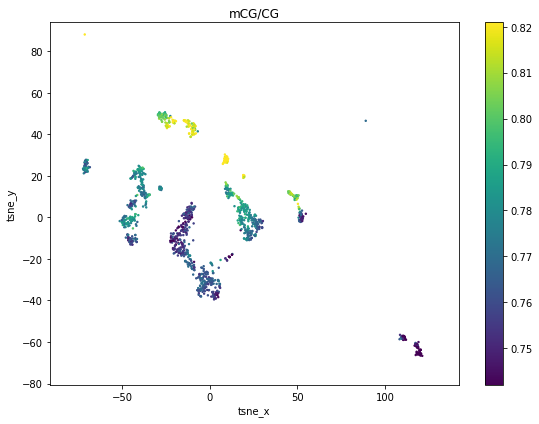

In [6]:
# path setup
ens = 'Ens2'

ens_path = os.path.join(PATH_ENSEMBLES, ens)

# tsne choose perp30
# tsne_path = os.path.join(ens_path, 'tsne/tsne_ndim2_perp30_npc50_binc_mCH_100000_nmcc_{}.tsv'.format(ens))
tsne_path = os.path.join(ens_path, 'tsne/tsne_ndim2_perp30_npc50_binc_mCHmCG_100000_nmcc_{}.tsv'.format(ens))

# clustering choose k30 
# cluster_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCH_100000_nmcc_{}.tsv'.format(ens)) 
cluster_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCHmCG_100000_nmcc_{}.tsv'.format(ens)) 

# annotation choose k30
# annotation_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCH_100000_nmcc_{}.tsv.annot'.format(ens)) 
annotation_path = os.path.join(ens_path, 'cluster/cluster_lv_npc50_k30_binc_mCHmCG_100000_nmcc_{}.tsv.annot'.format(ens)) 

# mapping summary
meta_path = os.path.join(ens_path, 'mapping_summary_{}.tsv'.format(ens))

# cell qc
cellcovr_path = os.path.join(ens_path, 'binc_mCH_100000_QC_cells_covr_{}.tsv'.format(ens))

# data loading
df_tsne = pd.read_table(tsne_path, index_col='sample')
df_cluster = pd.read_table(cluster_path, index_col='sample')
df_meta = pd.read_table(meta_path, index_col='Sample')
df_cellcovr = pd.read_table(cellcovr_path, index_col='sample')
df_annot = pd.read_table(annotation_path, index_col='cluster_ID')
df_cluster = pd.merge(df_cluster, df_annot, left_on='cluster_ID', right_index=True, how='left')
df_all = pd.concat([df_tsne, df_cluster, df_meta, df_cellcovr], axis=1)

# plots
plt.close('all')
tc_list_labels = ['cluster_ID', 'cluster_annotation']
tc_list_values = ['mCH/CH', 'mCG/CG', '% Genome covered', 'Mapping rate', 'Nonclonal reads', 'covr_before', 'covr_after']
tc_list_values = ['mCH/CH', 'mCG/CG']

for tc in tc_list_labels:
    plot_tsne_labels(df_all, tc=tc, legend_mode=1,  
#                     output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc, ens)), 
                    )
for tc in tc_list_values:
    plot_tsne_values(df_all, tc=tc, 
#                     output=os.path.join(ens_path, 'plots/tsne_coloredby_{}_{}.pdf'.format(tc.replace('/', '-'), ens)), 
                    )